### Upload a personal image in a hosting place that can be accessed using an URL

In [ ]:
!wget https://cdn.pixabay.com/photo/2018/05/31/23/23/watercolor-3445376_1280.jpg -O img.png

--2022-10-31 17:24:53--  https://cdn.pixabay.com/photo/2018/05/31/23/23/watercolor-3445376_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.11.234, 104.18.10.234, 2606:4700::6812:bea, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.11.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152849 (149K) [binary/octet-stream]
Saving to: ‘img.png’

img.png             100%[===================>] 149.27K  --.-KB/s    in 0.03s   

2022-10-31 17:24:53 (5.27 MB/s) - ‘img.png’ saved [152849/152849]



#### Import necessary libraries.

In [ ]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to perform filtering on an image
import cv2
# Used to create kernels for filtering
import numpy as np
# Used to generate image noise with random probability
from skimage.util import random_noise
# Used to convolve the image
from scipy import ndimage

### Some helper methods.

In [ ]:
def plot_image(image_1, image_2,title_1="Original",title_2="New Image"):
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap='gray')
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap='gray')
    plt.title(title_2)
    plt.show()

### Convert your image into grayscale.

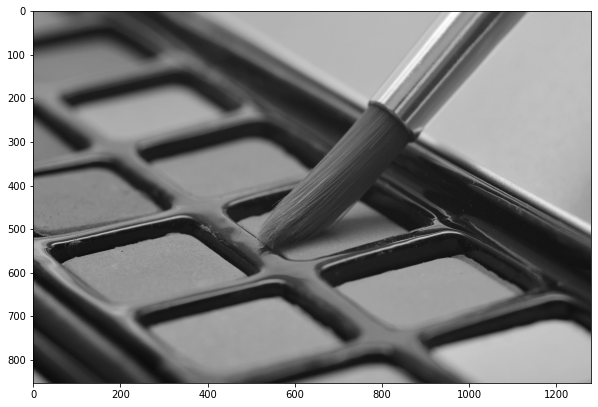

In [ ]:
img = cv2.imread("img.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [ ]:
print(img)

[[140 140 139 ... 190 191 191]
 [140 140 140 ... 190 191 191]
 [140 140 139 ... 190 191 191]
 ...
 [159 158 158 ... 161 160 160]
 [160 159 159 ... 159 157 157]
 [160 160 159 ... 157 156 156]]


### Add salt and pepper noise with a probability of 0.15.

random_noise(image, mode, amount):

mode parameter takes a value as: gaussian, speckle, salt&pepper(s&p) etc.

amount parameter refers the probability of noise in that picture

In [ ]:
# random_noise function return the image as float-64 type
noise_img = random_noise(img, mode= 's&p', amount = 0.15)
# make the image suitable for uint-8
noise_img = np.array(255*noise_img, dtype = 'uint8')

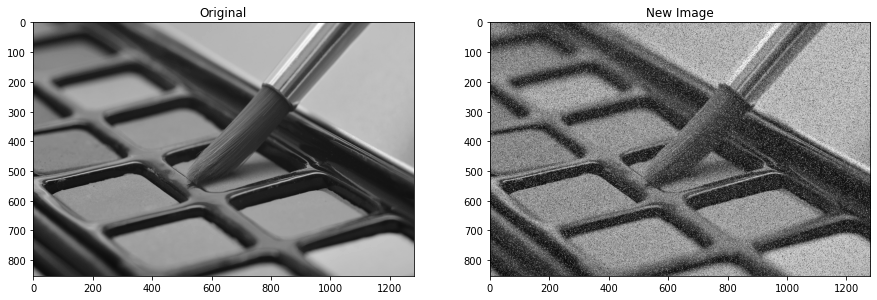

In [ ]:
plot_image(img, noise_img)

### Performing averaging filter and median filter with various sizes on the noisy image.

#### Average filtering is used.

In [ ]:
avg_kernel = np.ones((3,3))/9
avg_kernel2 = np.ones((5,5))/25
avg_kernel3 = np.ones((9,9))/81

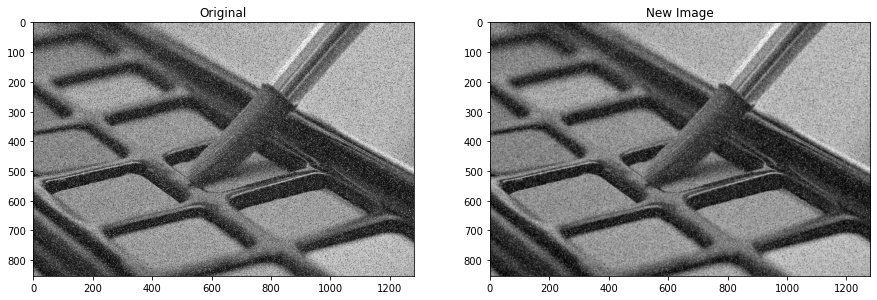

In [ ]:
# avg value is 1/9
avg_img = cv2.filter2D(noise_img, ddepth = -1, kernel = avg_kernel)
plot_image(noise_img,avg_img)

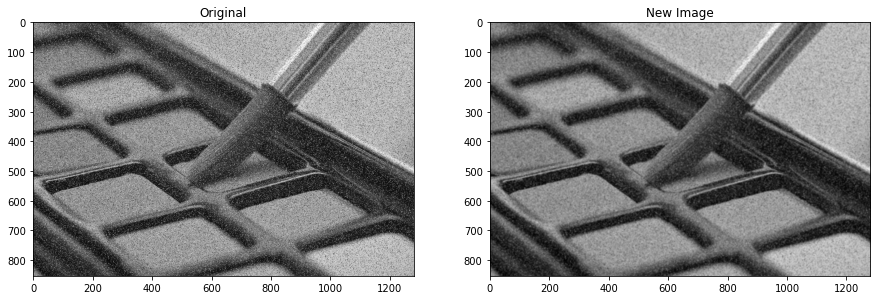

In [ ]:
# avg value is 1/25
avg_img = cv2.filter2D(noise_img, ddepth = -1, kernel = avg_kernel2)
plot_image(noise_img,avg_img)

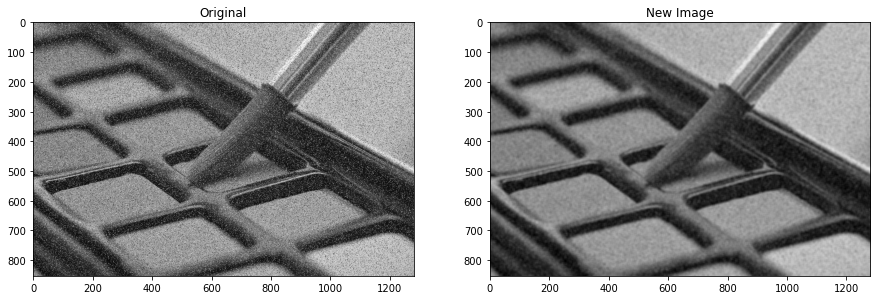

In [ ]:
# avg value is 1/81
avg_img = cv2.filter2D(noise_img, ddepth = -1, kernel = avg_kernel3)
plot_image(noise_img,avg_img)

As you can see in the pictures, when the kernel size bigger blur of the image also increased and details begins to disappear.

By smoothing the original image we get rid of lots of the finer detail.

#### Median filtering is used.

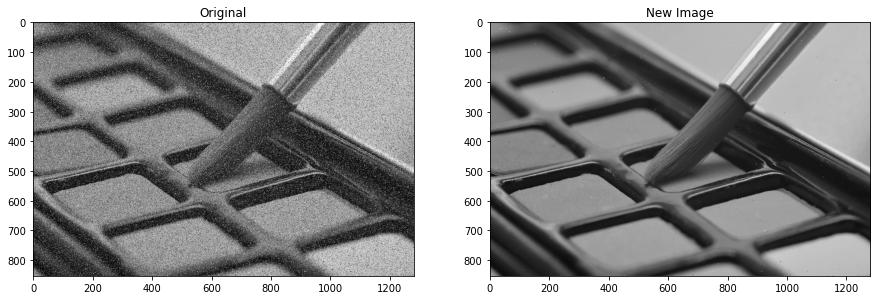

In [ ]:
# ksize = 3
md_img = cv2.medianBlur(noise_img, 3)
plot_image(noise_img, md_img)

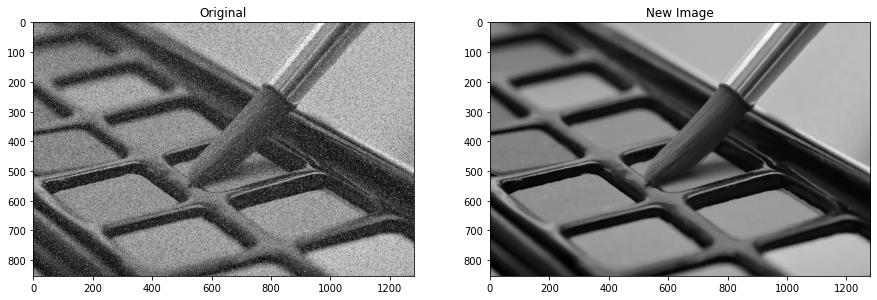

In [ ]:
# ksize = 5
md_img = cv2.medianBlur(noise_img, 5)
plot_image(noise_img, md_img)

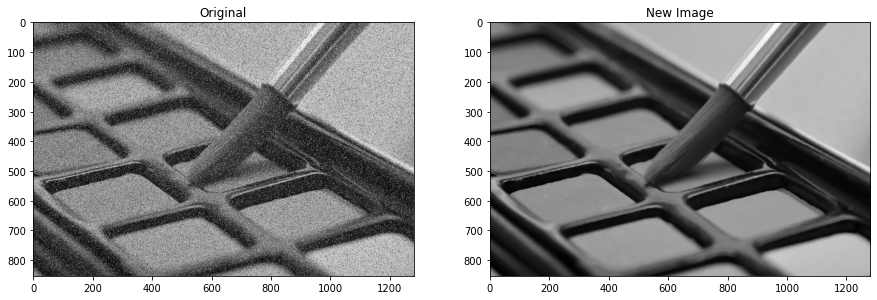

In [ ]:
# ksize = 7
md_img = cv2.medianBlur(noise_img, 7)
plot_image(noise_img, md_img)


As you can see in the pictures, when the ksize bigger noise of the image also begins to disappear and details shown.

By filtering the noised image we get rid of lots of noise when ksize increased.

### Implement Robert's filters

In [ ]:
roberts_X = np.array([[-1, 0], [0, 1]])
roberts_Y = np.array([[0, -1], [1, 0]])

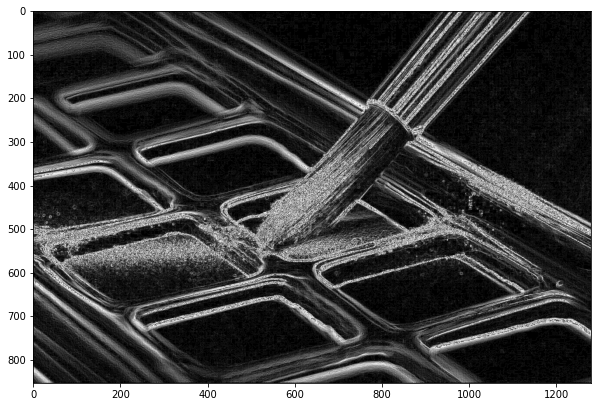

In [ ]:
vertical = ndimage.convolve( img, roberts_X)
horizontal = ndimage.convolve( img, roberts_Y)

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)).astype('uint8')

plt.figure(figsize = ((10,10)))
plt.imshow(edged_img, cmap='gray')

### Use Canny Edge Detector incorporated in OpenCV

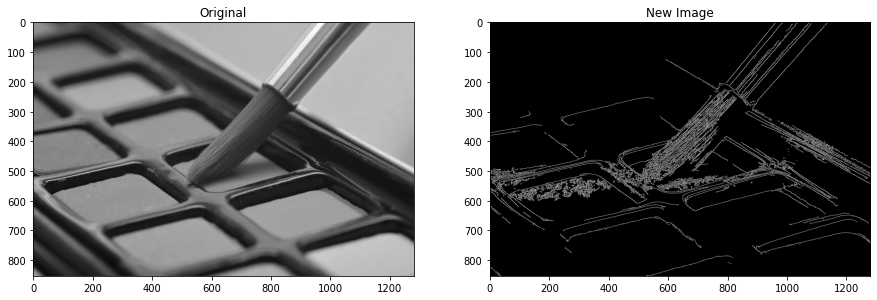

In [ ]:
edges = cv2.Canny(img, 10, 100)
plot_image(img, edges)

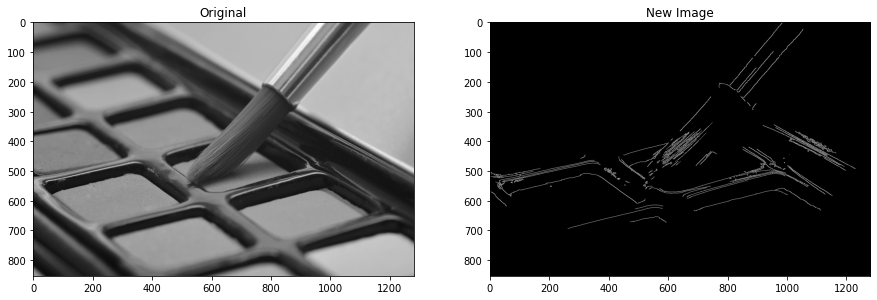

In [ ]:
edges = cv2.Canny(img, 100, 215)
plot_image(img, edges)

I pick two different sets of hysteresis thresholds. They are (10,100) and (100,215)

When I choose (10,100) threshold range, output of the image edges as seen above have more edges. So we can understand that any edges with intensity gradient more than 100 are sure to be edges and those below 10 are sure to be non-edges, so discarded.

It is also true for (100, 215) but this time we understand that intensity values between 100 and 215 does not have lots of edges.